In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pathlib import Path
import seaborn as sns

In [2]:
datapath = Path().resolve().parent.parent.parent / 'data' / 'rws data' / '20231106_003_WL'
wl_data_raw = pd.read_csv(datapath / '20231106_003.csv', sep=';', decimal=',', header=[0], parse_dates=['WAARNEMINGDATUM'], dayfirst=True)


In [3]:
pd.to_datetime(wl_data_raw.loc[:, 'WAARNEMINGDATUM']).dt.month
    #wl_data_raw.WAARNEMINGDATUM.year == 2019, wl_data_raw.WAARNEMINGDATUM.month == 1]

0         1
1         1
2         1
3         1
4         1
         ..
219739    2
219740    2
219741    2
219742    2
219743    2
Name: WAARNEMINGDATUM, Length: 219744, dtype: int64

In [4]:
wl = {
    2019: {1: None, 4: None, 7: None, 10: None},
    2020: {1: None, 4: None, 7: None, 10: None},
    2021: {1: None},
}
station = 'BUITHZN'
# station = 'IJMDBNN'
for y in wl.keys():
    for m in wl[y].keys():
        wl[y][m] = wl_data_raw.loc[(wl_data_raw.WAARNEMINGDATUM.dt.year == y) & (wl_data_raw.WAARNEMINGDATUM.dt.month == m) & (wl_data_raw.LOCATIE_CODE == station), 'NUMERIEKEWAARDE'].copy() / 100



In [10]:
wl_data_raw.head().columns

Index(['MONSTER_IDENTIFICATIE', 'MEETPUNT_IDENTIFICATIE', 'LOCATIE_CODE',
       'TYPERING_OMSCHRIJVING', 'TYPERING_CODE', 'GROOTHEID_OMSCHRIJVING',
       'GROOTHEID_ CODE', 'PARAMETER_OMSCHRIJVING', 'PARAMETER_ CODE',
       'CAS_NR', 'EENHEID_CODE', 'HOEDANIGHEID_OMSCHRIJVING',
       'HOEDANIGHEID_CODE', 'COMPARTIMENT_OMSCHRIJVING', 'COMPARTIMENT_CODE',
       'WAARDEBEWERKINGSMETHODE_OMSCHRIJVING', 'WAARDEBEWERKINGSMETHODE_CODE',
       'WAARDEBEPALINGSMETHODE_OMSCHRIJVING', 'WAARDEBEPALINGSMETHODE_CODE',
       'BEMONSTERINGSSOORT_OMSCHRIJVING', 'BEMONSTERINGSSOORT_CODE',
       'WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)', 'LIMIETSYMBOOL',
       'NUMERIEKEWAARDE', 'ALFANUMERIEKEWAARDE', 'KWALITEITSOORDEEL_CODE',
       'REFERENTIE', 'NOTITIE_CODE', 'NOTITIE_OMSCHRIJVING', 'STATUSWAARDE',
       'OPDRACHTGEVENDE_INSTANTIE', 'MEETAPPARAAT_OMSCHRIJVING',
       'MEETAPPARAAT_CODE', 'BEMONSTERINGSAPPARAAT_OMSCHRIJVING',
       'BEMONSTERINGSAPPARAAT_CODE', 'PLAATSBEPALINGSAPPARAAT

In [12]:
len_ = max(wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'BUITHZN', :].shape[0], wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'IJMDBNN', :].shape[0])
wl_df = pd.DataFrame(
    index=range(len_),
    columns=['BUITHZN', 'IJMDBNN', 'WAARNEMINGDATUM', 'WAARNEMINGTIJD'],
)
wl_df.loc[:, 'BUITHZN'] = wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'BUITHZN', 'NUMERIEKEWAARDE'].values / 100
wl_df.loc[:, 'IJMDBNN'] = wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'IJMDBNN', 'NUMERIEKEWAARDE'].values / 100
wl_df.loc[:, 'WAARNEMINGDATUM'] = wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'BUITHZN', 'WAARNEMINGDATUM'].values
wl_df.loc[:, 'WAARNEMINGTIJD'] = wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'BUITHZN', 'WAARNEMINGTIJD (MET/CET)'].values

C:\Users\Heijden\AppData\Local\Temp\ipykernel_37328\3198705828.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wl_df.loc[:, 'BUITHZN'] = wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'BUITHZN', 'NUMERIEKEWAARDE'].values / 100
C:\Users\Heijden\AppData\Local\Temp\ipykernel_37328\3198705828.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wl_df.loc[:, 'IJMDBNN'] = wl_data_raw.loc[wl_data_raw.LOCATIE_CODE == 'IJMDBNN', 'NUMERIEKEWAARDE'].values / 100
C:\Users\Heijden\AppData\Local\Temp\ipykernel_37328\3198705828.py:8: FutureWarning: In a future vers

In [14]:
wl_df.to_csv(datapath / 'wl_obs_df.csv', index=False)

In [5]:
wl_data_raw.loc[(wl_data_raw.LOCATIE_CODE == 'BUITHZN') & (wl_data_raw.WAARNEMINGDATUM.dt.year == 2019), 'NUMERIEKEWAARDE']

0       -47
1       -46
2       -46
3       -47
4       -45
         ..
52555   -41
52556   -41
52557   -41
52558   -41
52559   -41
Name: NUMERIEKEWAARDE, Length: 52560, dtype: int64

<AxesSubplot:xlabel='NUMERIEKEWAARDE', ylabel='Density'>

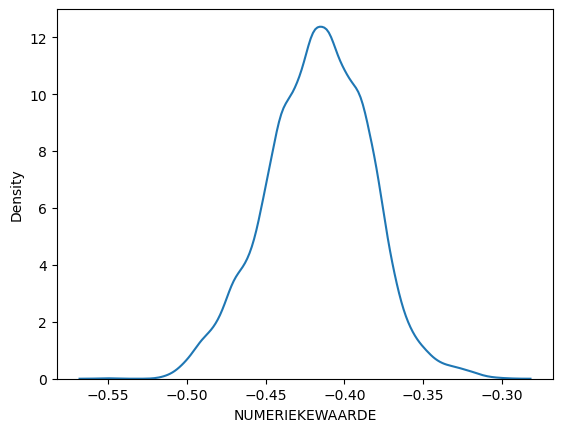

In [6]:
sns.kdeplot(wl[2021][1])

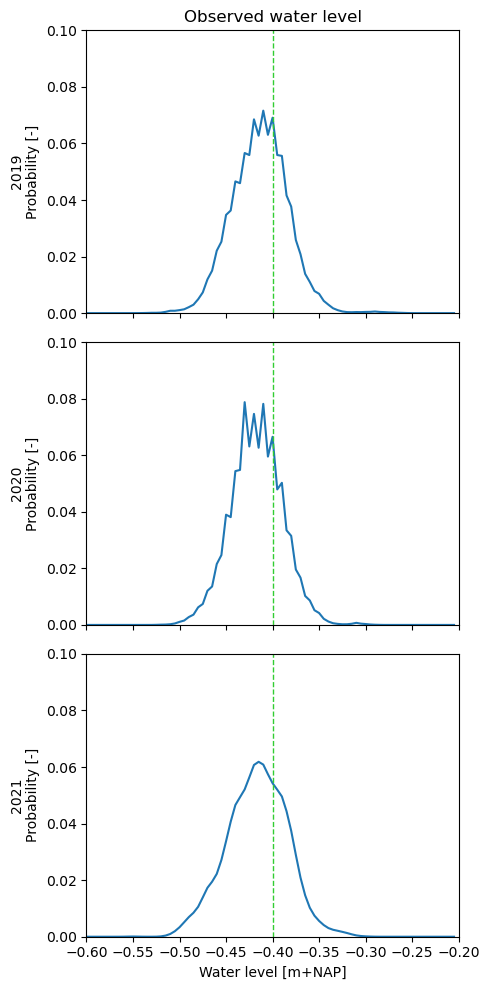

In [71]:
eval = np.arange(-0.6, -0.2, 0.005)
fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True)
for i, y in enumerate(wl.keys()):
    wl_sum = []
    for m in wl[y].keys():
        wl_sum += wl[y][m].tolist()

    kde = gaussian_kde(wl_sum).pdf(eval)
    kde = kde/sum(kde)
    ax[i].plot(eval, kde, label=y)
    ax[i].set_ylabel(f'{y}\nProbability [-]')
    ax[i].axvline(-0.4, color='limegreen', lw=1, ls='--')
    ax[i].set_xlim(-0.6, -0.2)
    ax[i].set_ylim(0, 0.1)#0.02)

ax[2].set_xlabel('Water level [m+NAP]')
ax[0].set_title('Observed water level')

fig.tight_layout()

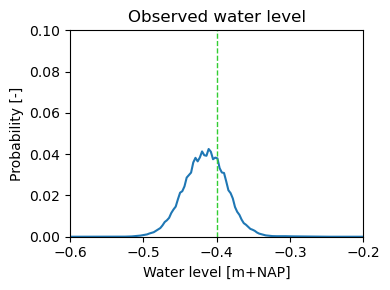

In [23]:
eval = np.arange(-0.6, -0.2, 0.003)
fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True)
wl_sum = []
for i, y in enumerate(wl.keys()):
    for m in wl[y].keys():
        wl_sum += wl[y][m].tolist()

kde = gaussian_kde(wl_sum, bw_method=0.15).pdf(eval)
kde = kde/sum(kde)
ax.plot(eval, kde, label=y)
ax.set_ylabel(f'Probability [-]')
ax.axvline(-0.4, color='limegreen', lw=1, ls='--')
ax.set_xlim(-0.6, -0.2)
ax.set_ylim(0, 0.1)#0.02)

ax.set_xlabel('Water level [m+NAP]')
ax.set_title('Observed water level')

fig.tight_layout()

In [58]:
eval

array([-0.6])